In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json 
import random 
from warnings import filterwarnings
filterwarnings('ignore')
import math
from datetime import datetime


In [13]:
config = json.loads(open('config.json').read()) 
train_set_path = config["local"]["train_set_path"]
test_set_path = config["local"]["test_set_path"]
val_set_path = config["local"]["val_set_path"]
model_path = config["local"]["model_path"]
train= True
save_model = False
max_epochs = 200
early_stopping = True

In [14]:
# Data Augmentation and Rescaling for Training and Validation Sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)  # Just rescaling for validation data

# Create Training Set Generator
train_set = train_datagen.flow_from_directory(
    train_set_path,        # Path to the folder containing training images
    target_size=(150, 150),          # Resize images to 150x150
    batch_size=32,                   # Process 32 images per batch
    class_mode='binary'              # Binary classification (cats vs dogs)
)

#Validation Set
val_set = val_datagen.flow_from_directory(val_set_path,
                                           target_size=(150,150),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


# Define the CNN Model
classifier = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
# Compile the Model
classifier.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

if train: 
    if early_stopping:
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    else:
        early_stopping = None

    # Train the Model
    history = classifier.fit(
        train_set,
        steps_per_epoch=math.ceil(train_set.samples / train_set.batch_size),
        epochs=max_epochs,
        validation_data=val_set,
        validation_steps=math.ceil(val_set.samples / val_set.batch_size),
        callbacks=[early_stopping]
    )
    
    if not os.path.exists(os.path.dirname(model_path)):
        os.makedirs(os.path.dirname(model_path))    
    if save_model:
        classifier.save(model_path)
else: 
    classifier = tf.keras.models.load_model(model_path)



Epoch 1/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.6208 - loss: 0.6358 - val_accuracy: 0.7528 - val_loss: 0.5016
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/200


2024-11-11 16:03:30.222505: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-11-11 16:03:30.228975: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 190ms/step - accuracy: 0.7462 - loss: 0.5107 - val_accuracy: 0.7834 - val_loss: 0.4709
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/200


2024-11-11 16:05:28.867802: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 191ms/step - accuracy: 0.7887 - loss: 0.4494 - val_accuracy: 0.8162 - val_loss: 0.4018
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.8112 - loss: 0.4036 - val_accuracy: 0.8356 - val_loss: 0.3698
Epoch 8/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/200


2024-11-11 16:09:26.444159: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 192ms/step - accuracy: 0.8383 - loss: 0.3573 - val_accuracy: 0.8200 - val_loss: 0.3946
Epoch 10/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 252ms/step - accuracy: 0.8529 - loss: 0.3345 - val_accuracy: 0.8538 - val_loss: 0.3344
Epoch 12/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.8667 - loss: 0.3088 - val_accuracy: 0.8408 - val_loss: 0.3692
Epoch 14/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.8759 - loss: 0.2847 - val_accuracy: 0.8546 - val_loss: 0.3382
Epoch 16/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/200


2024-11-11 16:19:21.491799: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.8926 - loss: 0.2554 - val_accuracy: 0.8680 - val_loss: 0.3197
Epoch 18/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 346s 554ms/step - accuracy: 0.8949 - loss: 0.2509 - val_accuracy: 0.8726 - val_loss: 0.3331
Epoch 20/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 441s 705ms/step - accuracy: 0.9023 - loss: 0.2318 - val_accuracy: 0.8710 - val_loss: 0.3114
Epoch 22/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 23/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 459s 733ms/step - accuracy: 0.9130 - loss: 0.2087 - val_accuracy: 0.8628 - val_loss: 0.3499
Epoch 24/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 25/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 841ms/step - accuracy: 0.9159 - loss: 0.20

### Prediction of Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


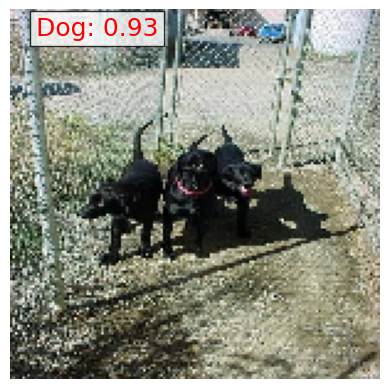

In [67]:
#get random image from train_set_folder
all_files = []
for root, dirs, files in os.walk(train_set_path):
    for file in files:
        all_files.append(os.path.join(root, file))  
img_path = random.choice(all_files)
img1 = image.load_img(img_path, target_size=(150, 150))  # Match target size with training size
img = image.img_to_array(img1)  # Convert image to array
img = img / 255.0  # Normalize the image

# Create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = classifier.predict(img)  # No need for batch_size or steps arguments

# Interpret the prediction
if prediction[0, 0] > 0.5:
    value = 'Dog: %1.2f' % prediction[0, 0]
    plt.text(10, 10, value, color='red', fontsize=18, bbox=dict(facecolor='white', alpha=0.8))
else:
    value = 'Cat: %1.2f' % (1.0 - prediction[0, 0])
    plt.text(10, 10, value, color='red', fontsize=18, bbox=dict(facecolor='white', alpha=0.8))

# Display the image
plt.imshow(img1)
plt.axis('off')  # Hide axes
plt.show()


In [27]:
# Reset the generator before prediction
val_set.reset()
steps = math.ceil(val_set.samples / val_set.batch_size)
# Use predict with steps argument
predictions = classifier.predict(val_set, steps=steps)
df = pd.DataFrame({
    'filename': val_set.filenames,
    'predict': predictions.flatten(),
    'y': val_set.classes
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step


,filename,predict,y,y_pred
0,cat/cat.100.jpg,0.71647,0,1
1,cat/cat.1000.jpg,0.00053,0,0
2,cat/cat.10000.jpg,0.00404,0,0
3,cat/cat.10010.jpg,0.61036,0,1
4,cat/cat.10017.jpg,0.01224,0,0
5,cat/cat.10022.jpg,0.03072,0,0
6,cat/cat.10024.jpg,0.05375,0,0
7,cat/cat.10031.jpg,0.35737,0,0
8,cat/cat.10040.jpg,0.00144,0,0
9,cat/cat.10051.jpg,0.81685,0,1


In [28]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 645


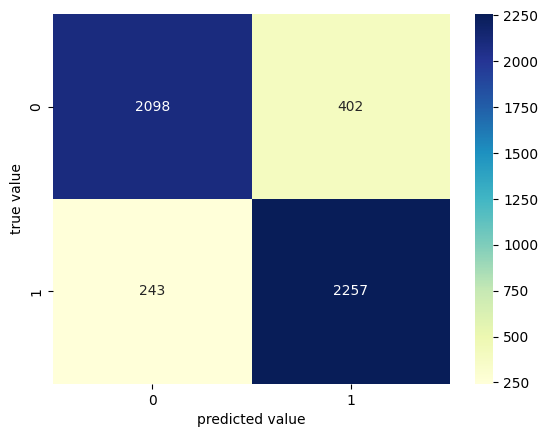

In [29]:
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [30]:
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,656,964 (36.84 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,828,483 (18.42 MB)

### Model Performance on Unseen Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


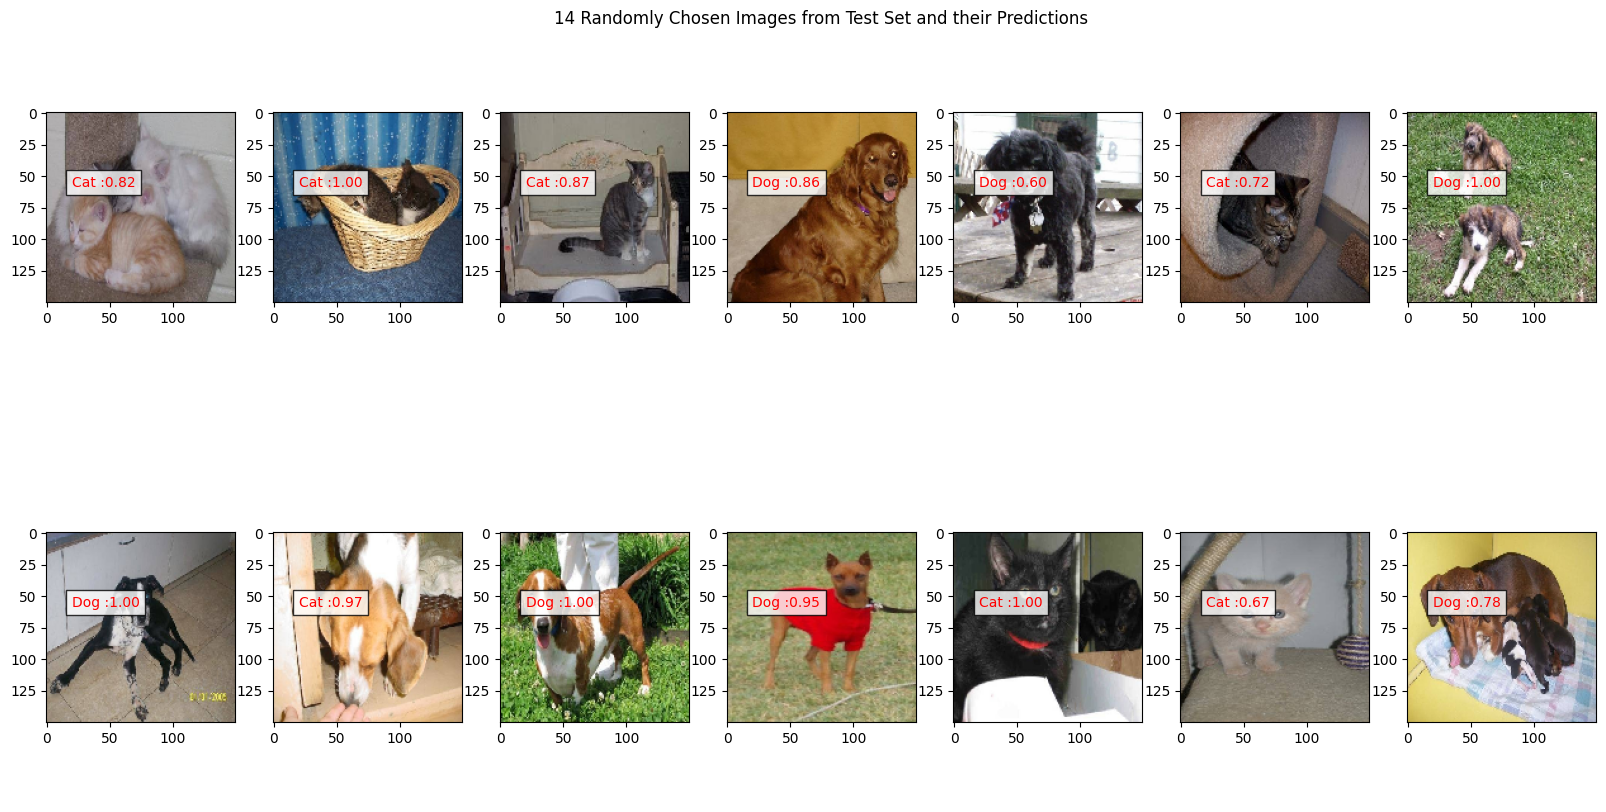

In [51]:
fig=plt.figure(figsize=(20, 10))
plt.title('14 Randomly Chosen Images from Test Set and their Predictions') 
plt.axis('off') 

columns = 7
rows = 2

for root, dirs, files in os.walk(test_set_path):
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        img_path = f'{test_set_path}/{i+1}.jpg' 
        # Load and preprocess the image
        img1 = image.load_img(img_path, target_size=(150, 150))
        img = image.img_to_array(img1)
        img = img/255
        img = np.expand_dims(img, axis=0)
        prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
        if(prediction[:,:]>0.5):
            value ='Dog :%1.2f'%(prediction[0,0])
            plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        else:
            value ='Cat :%1.2f'%(1.0-prediction[0,0])
            plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        plt.imshow(img1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


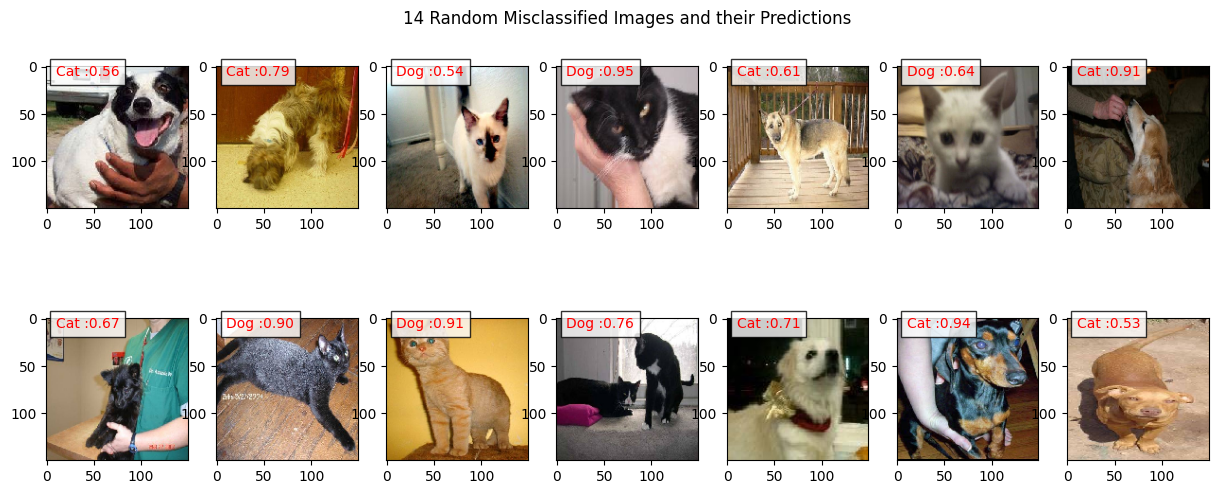

In [52]:
# plot wrong classifications in valuation set
fig=plt.figure(figsize=(15, 6))
plt.title('14 Random Misclassified Images and their Predictions') 
plt.axis('off')
columns = 7
rows = 2

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    # randomly select a misclassified image
    length = misclassified['y'].count() 
    img_path = misclassified.iloc[random.randint(0, length)]['filename']
    img_path = f'{val_set_path}/{img_path}'
    # Load and preprocess the image
    img1 = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(10, 10,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(10, 10,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)
plt.show()

In [65]:
# Model Accuracy
x1 = classifier.evaluate(train_set) 
x2 = classifier.evaluate(val_set)  
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.9188 - loss: 0.2018
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.8475 - loss: 0.3688
Training Accuracy  : 91.85%     Training loss  : 0.199788
Validation Accuracy: 87.10%     Validation loss: 0.311389


### Get predictions of test dataset 

In [68]:
predictions =  []
for file in os.listdir(test_set_path):
    img_path = os.path.join(test_set_path, file)
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img)
    id = file.split('.')[0] 
    if prediction[0, 0] > 0.5:
        label = 1
    else:
        value = 0
    predictions.append({'id': id, 'label': label})  
predictions = pd.DataFrame(predictions)
predictions.sort_values(by='id', inplace=True)
predictions.to_csv('predictions.csv', index=False)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'